In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline, make_pipeline
from scipy.stats import skew
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import Imputer

In [3]:
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.linear_model import ElasticNet, SGDRegressor, BayesianRidge
from sklearn.kernel_ridge import KernelRidge
from xgboost import XGBRegressor

# read data set with part preprocessing

In [4]:
price_origin_train = pd.read_csv('./remastered.csv')
price_origin_test = pd.read_csv('./test_prepro.csv')

pd.set_option("display.max_columns",1000000)
pd.set_option('display.max_rows', 1000000)


In [5]:
price_origin_train.head(5)
price_origin_test.head(5)

,index,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,0,1461,20,RH,80.0,11622,2,0,4,4,4,5,3,NAmes,Feedr,Norm,1Fam,1,5,6,1961,1961,Gable,2,VinylSd,VinylSd,1.0,0.0,3,3,5,3,3,1,3,468,2,144,270,882,5,3,Y,5,896,0,0,896,0,0,1,0,2,1,3,5,8,0,0,5,1961,1,1,730,3,3,3,140,0,0,0,120,0,0,3,NaN,0,6,2010,WD,Normal
1,1,1462,20,RL,81.0,14267,2,0,3,4,4,4,3,NAmes,Norm,Norm,1Fam,1,6,6,1958,1958,Hip,2,Wd Sdng,Wd Sdng,3.0,108.0,3,3,5,3,3,1,5,923,1,0,406,1329,5,3,Y,5,1329,0,0,1329,0,0,1,1,3,1,4,6,8,0,0,5,1958,1,1,312,3,3,3,393,36,0,0,0,0,0,0,Gar2,12500,6,2010,WD,Normal
2,2,1463,60,RL,74.0,13830,2,0,3,4,4,5,3,Gilbert,Norm,Norm,1Fam,4,5,5,1997,1998,Gable,2,VinylSd,VinylSd,1.0,0.0,3,3,4,4,3,1,6,791,1,0,137,928,5,4,Y,5,928,701,0,1629,0,0,2,1,3,1,3,6,8,1,3,5,1997,3,2,482,3,3,3,212,34,0,0,0,0,0,3,NaN,0,3,2010,WD,Normal
3,3,1464,60,RL,78.0,9978,2,0,3,4,4,5,3,Gilbert,Norm,Norm,1Fam,4,6,6,1998,1998,Gable,2,VinylSd,VinylSd,3.0,20.0,3,3,4,3,3,1,6,602,1,0,324,926,5,5,Y,5,926,678,0,1604,0,0,2,1,3,1,4,7,8,1,4,5,1998,3,2,470,3,3,3,360,36,0,0,0,0,0,0,NaN,0,6,2010,WD,Normal
4,4,1465,120,RL,43.0,5005,2,0,3,2,4,5,3,StoneBr,Norm,Norm,TwnhsE,1,8,5,1992,1992,Gable,2,HdBoard,HdBoard,1.0,0.0,4,3,4,4,3,1,5,263,1,0,1017,1280,5,5,Y,5,1280,0,0,1280,0,0,2,0,2,1,4,5,8,0,0,5,1992,2,2,506,3,3,3,0,82,0,0,144,0,0,0,NaN,0,1,2010,WD,Normal


# we think MSSubClass is an object feature so we convert data type from int to object

In [6]:
price_origin_train['MSSubClass'] = price_origin_train['MSSubClass'].astype(object)
price_origin_test['MSSubClass'] = price_origin_test['MSSubClass'].astype(object)

# now we want to lableencoder year variables

In [7]:
lis = ['YrSold','YearBuilt','YearRemodAdd','GarageYrBlt']
price_origin_train[lis] = price_origin_train[lis].astype(object)
price_origin_test[lis] = price_origin_test[lis].astype(object)

## to check concerting is successful

In [8]:
price_origin_train.info()
price_origin_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 82 columns):
index            1460 non-null int64
Id               1460 non-null int64
MSSubClass       1460 non-null object
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null int64
Alley            1460 non-null int64
LotShape         1460 non-null int64
LandContour      1460 non-null int64
Utilities        1460 non-null int64
LotConfig        1460 non-null int64
LandSlope        1460 non-null int64
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null int64
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null object
YearRemodAdd     1460 non-null object
RoofStyle        1460 non-null object
RoofMatl         1460 non-null 

In [9]:
label = LabelEncoder()

## labelencoder convert object to int

In [10]:
price_origin_train["YearBuilt"] = label.fit_transform(price_origin_train["YearBuilt"])
price_origin_train["YearRemodAdd"] = label.fit_transform(price_origin_train["YearRemodAdd"])
price_origin_train["GarageYrBlt"] = label.fit_transform(price_origin_train["GarageYrBlt"])
price_origin_train["YrSold"] = label.fit_transform(price_origin_train["YrSold"])

price_origin_test["YearBuilt"] = label.fit_transform(price_origin_test["YearBuilt"])
price_origin_test["YearRemodAdd"] = label.fit_transform(price_origin_test["YearRemodAdd"])
price_origin_test["GarageYrBlt"] = label.fit_transform(price_origin_test["GarageYrBlt"])
price_origin_test["YrSold"] = label.fit_transform(price_origin_test["YrSold"])

In [159]:
price_origin_train.head(5)

,index,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0,1,60,RL,65.0,8450,2,0,4,4,4,5,3,CollgCr,Norm,Norm,1Fam,4,7,5,2003,2003,Gable,2,VinylSd,VinylSd,3.0,196.0,4,3,4,4,3,1,6,706,1,0,150,856,5,5,Y,5.0,856,854,0,1710,1,0,2,1,3,1,4,8,8,0,0,5,2003,2,2,548,3,3,3,0,61,0,0,0,0,0,0,NaN,0,2,2008,WD,Normal,208500
1,1,2,20,RL,80.0,9600,2,0,4,4,4,2,3,Veenker,Feedr,Norm,1Fam,1,6,8,1976,1976,Gable,2,MetalSd,MetalSd,1.0,0.0,3,3,5,4,3,4,5,978,1,0,284,1262,5,5,Y,5.0,1262,0,0,1262,0,1,2,0,3,1,3,6,8,1,3,5,1976,2,2,460,3,3,3,298,0,0,0,0,0,0,0,NaN,0,5,2007,WD,Normal,181500
2,2,3,60,RL,68.0,11250,2,0,3,4,4,5,3,CollgCr,Norm,Norm,1Fam,4,7,5,2001,2002,Gable,2,VinylSd,VinylSd,3.0,162.0,4,3,4,4,3,2,6,486,1,0,434,920,5,5,Y,5.0,920,866,0,1786,1,0,2,1,3,1,4,6,8,1,3,5,2001,2,2,608,3,3,3,0,42,0,0,0,0,0,0,NaN,0,9,2008,WD,Normal,223500
3,3,4,70,RL,60.0,9550,2,0,3,4,4,4,3,Crawfor,Norm,Norm,1Fam,4,7,5,1915,1970,Gable,2,Wd Sdng,Wd Shng,1.0,0.0,3,3,6,3,4,1,5,216,1,0,540,756,5,4,Y,5.0,961,756,0,1717,1,0,1,0,3,1,4,7,8,1,4,1,1998,1,3,642,3,3,3,0,35,272,0,0,0,0,0,NaN,0,2,2006,WD,Abnorml,140000
4,4,5,60,RL,84.0,14260,2,0,3,4,4,2,3,NoRidge,Norm,Norm,1Fam,4,8,5,2000,2000,Gable,2,VinylSd,VinylSd,3.0,350.0,4,3,4,4,3,3,6,655,1,0,490,1145,5,5,Y,5.0,1145,1053,0,2198,1,0,2,1,4,1,4,9,8,1,3,5,2000,2,3,836,3,3,3,192,84,0,0,0,0,0,0,NaN,0,12,2008,WD,Normal,250000


## drop index, ID, SalePrice

In [11]:
price_origin_train.drop(['SalePrice','Id','index'],axis=1,inplace=True)
price_origin_test.drop(['Id','index'],axis=1,inplace=True)

## drop 4 features we want to impute

In [12]:
price_origin_train_X_without4 = price_origin_train.drop(['LotFrontage','MasVnrArea','MasVnrType','Electrical'],axis=1)
price_origin_test_X_without4 = price_origin_test.drop(['LotFrontage','MasVnrArea','MasVnrType','Electrical'],axis=1)


# onehot object features and skew int/float features

In [13]:
X_numeric=price_origin_train_X_without4.select_dtypes(exclude=["object"])
skewness = X_numeric.apply(lambda x: skew(x))
skewness_features = skewness[abs(skewness) >= 0.5].index
price_origin_train_X_without4[skewness_features] = np.log1p(price_origin_train_X_without4[skewness_features])
price_origin_train_X_without4 = pd.get_dummies(price_origin_train_X_without4)

In [14]:
X_numeric=price_origin_test_X_without4.select_dtypes(exclude=["object"])
skewness = X_numeric.apply(lambda x: skew(x))
skewness_features = skewness[abs(skewness) >= 0.5].index
price_origin_test_X_without4[skewness_features] = np.log1p(price_origin_test_X_without4[skewness_features])
price_origin_test_X_without4 = pd.get_dummies(price_origin_test_X_without4)

In [228]:
price_origin_test_X_without4.shape

(1459, 185)

In [15]:
price_origin_test_X_without4.to_csv('./price_origin_test_X_without4.csv',index=False)

# we apply R api to impute missing data then we get overall data

In [229]:
data = pd.read_csv('./imputed_data_with_salePrice.csv')
test_data = pd.read_csv('./test_imputed_data_without_salePrice.csv')

In [230]:
test_data.shape

(1459, 189)

In [231]:
data.head(5)
test_data.head(5)

,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofMatl,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,X1stFlrSF,X2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,X3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_0,MSZoning_C..all.,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_0,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd.Sdng,Exterior1st_WdShing,Exterior2nd_0,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk.Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd.Sdng,Exterior2nd_Wd.Shng,CentralAir_N,CentralAir_Y,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,SaleType_0,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,MasVnrType,Electrical,LotFrontage,MasVnrArea
0,9.360741,1.098612,0.0,1.609438,1.609438,1.609438,1.791759,1.386294,0.693147,5,6,56,11,1.098612,1.386294,1.386294,5,1.386294,1.386294,0.693147,3,6.150603,1.098612,4.976734,5.602119,6.783325,1.791759,1.386294,6.799056,0.000000,0.0,6.799056,0.0,0.0,1,0.000000,2,0.693147,3,1.791759,2.197225,0.000000,0,1.791759,3.871201,1,1,730,1.386294,1.386294,1.386294,4.948760,0.000000,0.0,0.0,4.795791,0.0,0.0,1.386294,0.000000,6,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1.0,5,80.0,0.0
1,9.565775,1.098612,0.0,1.386294,1.609438,1.609438,1.609438,1.386294,0.693147,6,6,53,8,1.098612,1.386294,1.386294,5,1.386294,1.386294,0.693147,5,6.828712,0.693147,0.000000,6.008813,7.192934,1.791759,1.386294,7.192934,0.000000,0.0,7.192934,0.0,0.0,1,0.693147,3,0.693147,4,1.945910,2.197225,0.000000,0,1.791759,3.806662,1,1,312,1.386294,1.386294,1.386294,5.976351,3.610918,0.0,0.0,0.000000,0.0,0.0,0.000000,9.433564,6,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0

In [18]:
scaler = RobustScaler()

# we convert price variable by taking log

In [19]:
data_X = data.drop('SalePrice',axis = 1)
data_y = data['SalePrice']
log_y = np.log(data_y)

In [20]:
X_scaled = scaler.fit(data_X).transform(data_X)

In [21]:
test_data_scaled = scaler.fit(test_data).transform(test_data)

# feature selection

In [22]:
lasso=Lasso(alpha=0.001)
lasso.fit(X_scaled,log_y)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [23]:
FI_lasso = pd.DataFrame({"Feature Importance":lasso.coef_}, index=data_X.columns)

In [24]:
FI_lasso.sort_values("Feature Importance",ascending=False)

,Feature Importance
GrLivArea,0.149840
OverallQual,0.123932
Functional,0.093929
Neighborhood_NridgHt,0.078074
Neighborhood_StoneBr,0.072928
Neighborhood_NoRidge,0.069912
Neighborhood_Crawfor,0.060242
GarageCars,0.051359
Condition1_Norm,0.051297
Neighborhood_Somerst,0.047569


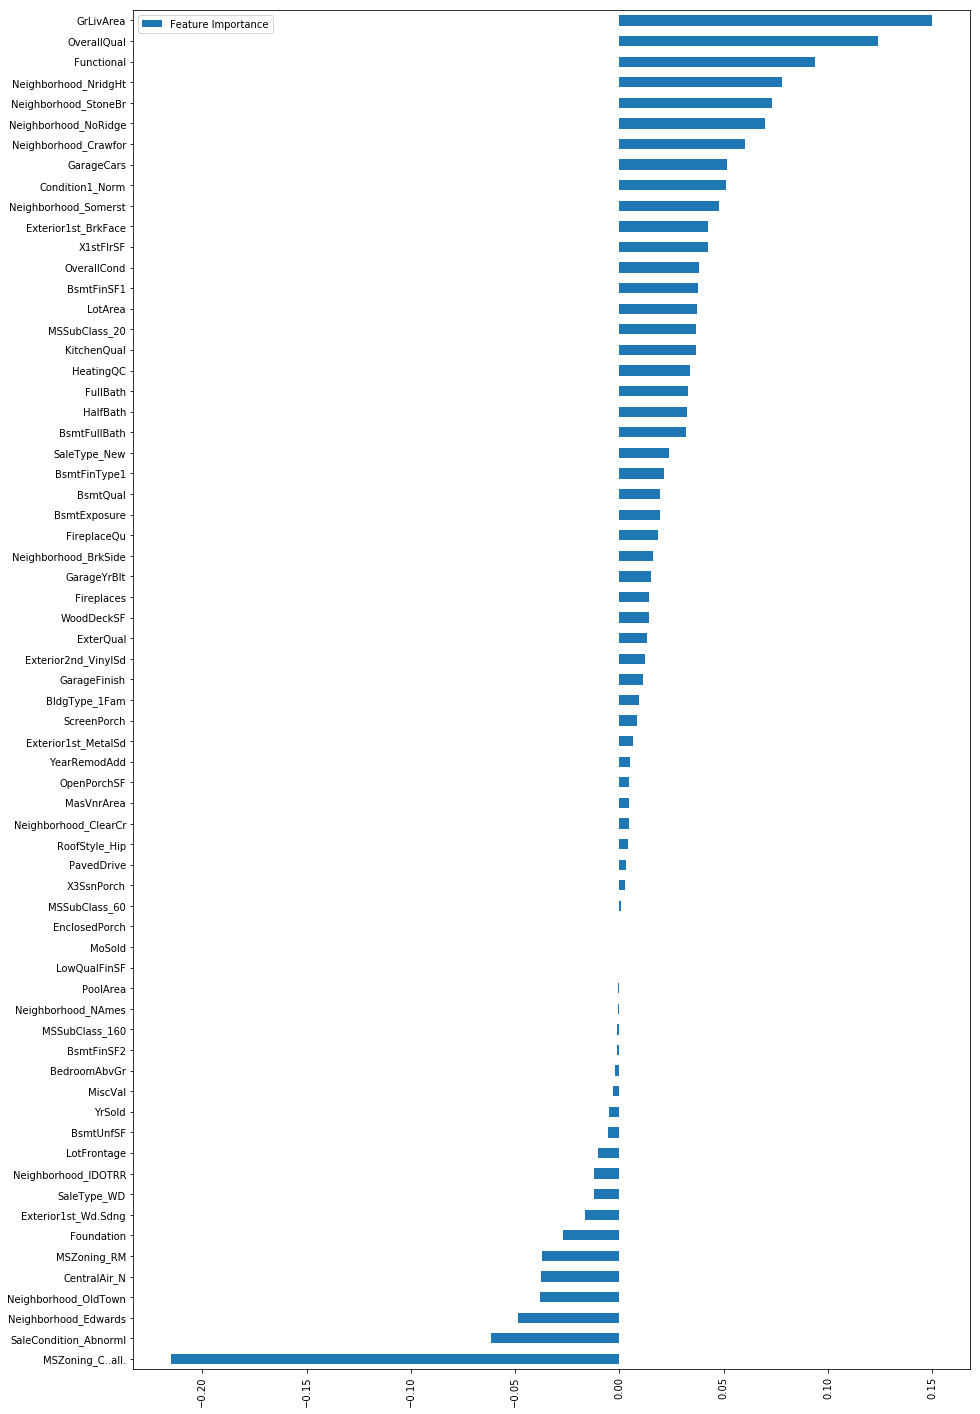

In [25]:
FI_lasso[FI_lasso["Feature Importance"]!=0].sort_values("Feature Importance").plot(kind="barh",figsize=(15,25))
plt.xticks(rotation=90)
plt.show()

# PCA

In [232]:
log_y = pd.DataFrame(log_y)
pca_train = PCA(n_components=50,svd_solver='full')

In [233]:
trans_data = pca_train.fit_transform(X_scaled)

In [234]:
X_scaled.shape

(1460, 191)

In [235]:
transfer_pca = pca_train.components_

In [236]:
trans_data

array([[-0.81413147,  1.65147354, -0.34114317, ..., -0.16917568,
         0.34794291, -0.27925028],
       [-1.10877891, -0.31969699, -0.08367564, ..., -0.16309189,
        -0.13172543,  0.577458  ],
       [-1.45578811,  1.70273503, -0.2887273 , ..., -0.35116284,
         0.03025835, -0.11670328],
       ...,
       [-0.60466998,  0.53271685, -0.33554889, ..., -0.764895  ,
         0.72079682, -1.17480861],
       [ 2.42416221, -5.63041926,  5.51912468, ...,  0.19362047,
         0.25977724,  0.42262339],
       [-0.05388125, -2.48763864,  4.36923281, ...,  0.11820295,
         0.05525521, -0.40137961]])

## PCA dimension reduction to 50 components on test data set

In [28]:
trans_test_data = pca.fit_transform(test_data_scaled)

In [29]:
np.sum(pca.explained_variance_ratio_)

0.8949162304620333

In [30]:
pca.explained_variance_

array([9.39832349, 4.41682716, 4.32542277, 3.15959905, 2.31854105,
       1.89030251, 1.59918038, 1.49310926, 1.2383929 , 1.15458166,
       1.06418022, 0.86942369, 0.68409398, 0.61582076, 0.5169504 ,
       0.50308478, 0.47028843, 0.44880531, 0.40857756, 0.34804174,
       0.34031912, 0.31783832, 0.2990187 , 0.28480139, 0.27813938,
       0.26383098, 0.25654487, 0.25011855, 0.24221528, 0.23747367,
       0.23547329, 0.22612853, 0.21752429, 0.21485637, 0.20708881,
       0.19579749, 0.18674198, 0.17619155, 0.17173133, 0.16941836,
       0.16464285, 0.15274829, 0.14692779, 0.14122931, 0.13689043,
       0.13112655, 0.1292209 , 0.1230357 , 0.11660116, 0.11250546])

In [31]:
cumsum = np.cumsum(pca.explained_variance_)
np.where(np.cumsum(pca.explained_variance_ratio_) >= 0.8)

(array([25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41,
        42, 43, 44, 45, 46, 47, 48, 49]),)

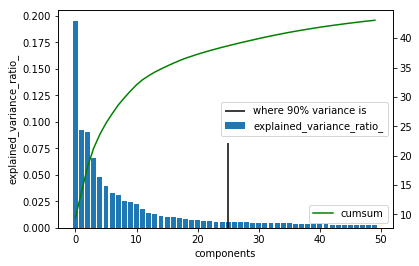

In [32]:
fig, ax1 = plt.subplots()
ax1.bar(range(0,50),pca.explained_variance_ratio_,label = 'explained_variance_ratio_')
ax1.set_xlabel('components')
ax1.set_ylabel('explained_variance_ratio_')

ax2 = ax1.twinx()
ax2.plot(range(0,50),cumsum,label='cumsum',color='g')
position = np.where(np.cumsum(pca.explained_variance_ratio_) >= 0.8)[0][0]
ax1.vlines(position,0,0.08,label='where 90% variance is')
ax1.legend(loc = 'right')
ax2.legend(loc = 'lower right')
plt.show()

# methodologies

## xgboost

In [33]:
xgboost = XGBRegressor()

In [34]:
xgboost.fit(trans_data,log_y)
pred = xgboost.predict(trans_test_data)
# mean_squared_error(log_y, pred)
# rmse = np.sqrt(mean_squared_error(log_y, pred))
# rmse

[13:39:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [35]:
test_sale_price = np.exp(pred)

In [36]:
test_sale_price_csv = pd.DataFrame(data = test_sale_price,columns = ['SalePrice'],index = range(1461,2920))
test_sale_price_csv.index.name = 'Id'

In [37]:
test_sale_price_csv.head(5)

,SalePrice
Id,
1461,139214.468750
1462,184928.875000
1463,200383.968750
1464,206120.953125
1465,165950.125000


In [38]:
test_sale_price_csv.to_csv('./test_sale_price_csv.csv',index = True)

# classify normal and non-normal, then we want to have a look at if there is a ratio between them before PCA. 

In [51]:
data_X.head(5)

,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofMatl,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,X1stFlrSF,X2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,X3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_C..all.,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd.Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk.Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd.Sdng,Exterior2nd_Wd.Shng,CentralAir_N,CentralAir_Y,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,MasVnrType,Electrical,LotFrontage,MasVnrArea
0,9.042040,1.098612,0.0,1.609438,1.609438,1.609438,1.791759,1.386294,1.609438,7,1.791759,3,27,1.098612,1.609438,1.386294,4,1.609438,1.386294,0.693147,6,6.561031,0.693147,0.0,5.017280,6.753438,1.791759,1.791759,6.753438,6.751101,0.0,7.444833,0.693147,0.000000,2,0.693147,3,0.693147,4,2.197225,2.197225,0.000000,0,1.791759,90,2,2,548,1.386294,1.386294,1.386294,0.000000,4.127134,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,2,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,3.0,5,65.0,196.0
1,9.169623,1.098612,0.0,1.609438,1.609438,1.609438,1.098612,1.386294,0.693147,6,2.197225,18,16,1.098612,1.386294,1.386294,5,1.609438,1.386294,1.609438,5,6.886532,0.693147,0.0,5.652489,7.141245,1.791759,1.791759,7.141245,0.000000,0.0,7.141245,0.000000,0.693147,2,0.000000,3,0.693147,3,1.945910,2.197225,0.693147,3,1.791759,44,2,2,460,1.386294,1.386294,1.386294,5.700444,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,5,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,

In [41]:
data_X.columns

Index(['LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'HouseStyle', 'OverallQual',
       ...
       'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial', 'MasVnrType', 'Electrical', 'LotFrontage',
       'MasVnrArea'],
      dtype='object', length=191)

In [48]:
for i in data_X.columns:
    if 'SaleCondition' in i:
        data_X.drop(i,axis = 1,inplace = True)

In [197]:
for i in test_data.columns:
    if 'SaleCondition' in i:
        test_data.drop(i,axis = 1,inplace = True)

In [198]:
test_data.head(5)

,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,HouseStyle,OverallQual,OverallCond,RoofMatl,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,X1stFlrSF,X2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,X3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_0,MSZoning_C..all.,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,YearBuilt_1879,YearBuilt_1880,YearBuilt_1890,YearBuilt_1895,YearBuilt_1896,YearBuilt_1900,YearBuilt_1901,YearBuilt_1902,YearBuilt_1905,YearBuilt_1907,YearBuilt_1910,YearBuilt_1912,YearBuilt_1914,YearBuilt_1915,YearBuilt_1916,YearBuilt_1917,YearBuilt_1918,YearBuilt_1919,YearBuilt_1920,YearBuilt_1921,YearBuilt_1922,YearBuilt_1923,YearBuilt_1924,YearBuilt_1925,YearBuilt_1926,YearBuilt_1927,YearBuilt_1928,YearBuilt_1929,YearBuilt_1930,YearBuilt_1931,YearBuilt_1932,YearBuilt_1934,YearBuilt_1935,YearBuilt_1936,YearBuilt_1937,YearBuilt_1938,YearBuilt_1939,YearBuilt_1940,YearBuilt_1941,YearBuilt_1942,YearBuilt_1945,YearBuilt_1946,YearBuilt_1947,YearBuilt_1948,YearBuilt_1949,YearBuilt_1950,YearBuilt_1951,YearBuilt_1952,YearBuilt_1953,YearBuilt_1954,YearBuilt_1955,YearBuilt_1956,YearBuilt_1957,YearBuilt_1958,YearBuilt_1959,YearBuilt_1960,YearBuilt_1961,YearBuilt_1962,YearBuilt_1963,YearBuilt_1964,YearBuilt_1965,YearBuilt_1966,YearBuilt_1967,YearBuilt_1968,YearBuilt_1969,YearBuilt_1970,YearBuilt_1971,YearBuilt_1972,YearBuilt_1973,YearBuilt_1974,YearBuilt_1975,YearBuilt_1976,YearBuilt_1977,YearBuilt_1978,YearBuilt_1979,YearBuilt_1980,YearBuilt_1981,YearBuilt_1982,YearBuilt_1983,YearBuilt_1984,YearBuilt_1985,YearBuilt_1986,YearBuilt_1987,YearBuilt_1988,YearBuilt_1989,YearBuilt_1990,YearBuilt_1991,YearBuilt_1992,YearBuilt_1993,YearBuilt_1994,YearBuilt_1995,YearBuilt_1996,YearBuilt_1997,YearBuilt_1998,YearBuilt_1999,YearBuilt_2000,YearBuilt_2001,YearBuilt_2002,YearBuilt_2003,YearBuilt_2004,YearBuilt_2005,YearBuilt_2006,YearBuilt_2007,YearBuilt_2008,YearBuilt_2009,YearBuilt_2010,YearRemodAdd_1950,YearRemodAdd_1951,YearRemodAdd_1952,YearRemodAdd_1953,YearRemodAdd_1954,YearRemodAdd_1955,YearRemodAdd_1956,YearRemodAdd_1957,YearRemodAdd_1958,YearRemodAdd_1959,YearRemodAdd_1960,YearRemodAdd_1961,YearRemodAdd_1962,YearRemodAdd_1963,YearRemodAdd_1964,YearRemodAdd_1965,YearRemodAdd_1966,YearRemodAdd_1967,YearRemodAdd_1968,YearRemodAdd_1969,YearRemodAdd_1970,YearRemodAdd_1971,YearRemodAdd_1972,YearRemodAdd_1973,YearRemodAdd_1974,YearRemodAdd_1975,YearRemodAdd_1976,YearRemodAdd_1977,YearRemodAdd_1978,YearRemodAdd_1979,YearRemodAdd_1980,YearRemodAdd_1981,YearRemodAdd_1982,YearRemodAdd_1983,YearRemodAdd_1984,YearRemodAdd_1985,YearRemodAdd_1986,Y

In [68]:
data_X.head(5)

,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofMatl,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,X1stFlrSF,X2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,X3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_C..all.,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsbShng,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd.Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk.Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd.Sdng,Exterior2nd_Wd.Shng,CentralAir_N,CentralAir_Y,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,MasVnrType,Electrical,LotFrontage,MasVnrArea
0,9.042040,1.098612,0.0,1.609438,1.609438,1.609438,1.791759,1.386294,1.609438,7,1.791759,3,27,1.098612,1.609438,1.386294,4,1.609438,1.386294,0.693147,6,6.561031,0.693147,0.0,5.017280,6.753438,1.791759,1.791759,6.753438,6.751101,0.0,7.444833,0.693147,0.000000,2,0.693147,3,0.693147,4,2.197225,2.197225,0.000000,0,1.791759,90,2,2,548,1.386294,1.386294,1.386294,0.000000,4.127134,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,2,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,3.0,5,65.0,196.0
1,9.169623,1.098612,0.0,1.609438,1.609438,1.609438,1.098612,1.386294,0.693147,6,2.197225,18,16,1.098612,1.386294,1.386294,5,1.609438,1.386294,1.609438,5,6.886532,0.693147,0.0,5.652489,7.141245,1.791759,1.791759,7.141245,0.000000,0.0,7.141245,0.000000,0.693147,2,0.000000,3,0.693147,3,1.945910,2.197225,0.693147,3,1.791759,44,2,2,460,1.386294,1.386294,1.386294,5.700444,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,5,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,

# redo PCA

## scalared data_X without SaleType

In [52]:
redo_data_X = scaler.fit(data_X).transform(data_X)

In [199]:
redo_test_data = scaler.fit(test_data).transform(test_data)

In [224]:
test_data.head(5)

,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,HouseStyle,OverallQual,OverallCond,RoofMatl,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,X1stFlrSF,X2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,X3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_0,MSZoning_C..all.,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Artery,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,YearBuilt_1879,YearBuilt_1880,YearBuilt_1890,YearBuilt_1895,YearBuilt_1896,YearBuilt_1900,YearBuilt_1901,YearBuilt_1902,YearBuilt_1905,YearBuilt_1907,YearBuilt_1910,YearBuilt_1912,YearBuilt_1914,YearBuilt_1915,YearBuilt_1916,YearBuilt_1917,YearBuilt_1918,YearBuilt_1919,YearBuilt_1920,YearBuilt_1921,YearBuilt_1922,YearBuilt_1923,YearBuilt_1924,YearBuilt_1925,YearBuilt_1926,YearBuilt_1927,YearBuilt_1928,YearBuilt_1929,YearBuilt_1930,YearBuilt_1931,YearBuilt_1932,YearBuilt_1934,YearBuilt_1935,YearBuilt_1936,YearBuilt_1937,YearBuilt_1938,YearBuilt_1939,YearBuilt_1940,YearBuilt_1941,YearBuilt_1942,YearBuilt_1945,YearBuilt_1946,YearBuilt_1947,YearBuilt_1948,YearBuilt_1949,YearBuilt_1950,YearBuilt_1951,YearBuilt_1952,YearBuilt_1953,YearBuilt_1954,YearBuilt_1955,YearBuilt_1956,YearBuilt_1957,YearBuilt_1958,YearBuilt_1959,YearBuilt_1960,YearBuilt_1961,YearBuilt_1962,YearBuilt_1963,YearBuilt_1964,YearBuilt_1965,YearBuilt_1966,YearBuilt_1967,YearBuilt_1968,YearBuilt_1969,YearBuilt_1970,YearBuilt_1971,YearBuilt_1972,YearBuilt_1973,YearBuilt_1974,YearBuilt_1975,YearBuilt_1976,YearBuilt_1977,YearBuilt_1978,YearBuilt_1979,YearBuilt_1980,YearBuilt_1981,YearBuilt_1982,YearBuilt_1983,YearBuilt_1984,YearBuilt_1985,YearBuilt_1986,YearBuilt_1987,YearBuilt_1988,YearBuilt_1989,YearBuilt_1990,YearBuilt_1991,YearBuilt_1992,YearBuilt_1993,YearBuilt_1994,YearBuilt_1995,YearBuilt_1996,YearBuilt_1997,YearBuilt_1998,YearBuilt_1999,YearBuilt_2000,YearBuilt_2001,YearBuilt_2002,YearBuilt_2003,YearBuilt_2004,YearBuilt_2005,YearBuilt_2006,YearBuilt_2007,YearBuilt_2008,YearBuilt_2009,YearBuilt_2010,YearRemodAdd_1950,YearRemodAdd_1951,YearRemodAdd_1952,YearRemodAdd_1953,YearRemodAdd_1954,YearRemodAdd_1955,YearRemodAdd_1956,YearRemodAdd_1957,YearRemodAdd_1958,YearRemodAdd_1959,YearRemodAdd_1960,YearRemodAdd_1961,YearRemodAdd_1962,YearRemodAdd_1963,YearRemodAdd_1964,YearRemodAdd_1965,YearRemodAdd_1966,YearRemodAdd_1967,YearRemodAdd_1968,YearRemodAdd_1969,YearRemodAdd_1970,YearRemodAdd_1971,YearRemodAdd_1972,YearRemodAdd_1973,YearRemodAdd_1974,YearRemodAdd_1975,YearRemodAdd_1976,YearRemodAdd_1977,YearRemodAdd_1978,YearRemodAdd_1979,YearRemodAdd_1980,YearRemodAdd_1981,YearRemodAdd_1982,YearRemodAdd_1983,YearRemodAdd_1984,YearRemodAdd_1985,YearRemodAdd_1986,Y

In [225]:
test_data.shape

(1459, 449)

In [223]:
redo_test_data.shape

(1459, 449)

In [219]:
trans_redo_data_X = transfer_pca*redo_test_data.T

ValueError: operands could not be broadcast together with shapes (50,191) (449,1459) 

In [209]:
redo_test_data.shape

(1459, 449)

In [208]:
pca.components_.shape

(50, 191)

In [201]:
trans_redo_test_data.shape

(1459, 50)

In [113]:
trans_redo_data_X.shape

(1460, 50)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184
0,-0.267660,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.557493,0.5,0.000000,-0.843882,0.00,0.0,1.0,0.0,-1.0,0.0,0.000000,0.000000,0.4,0.092710,0.0,0.0,-0.898157,-0.300181,0.0,0.00000,-0.524119,1.024186,0.0,0.342891,1.0,0.000000,0.0,1.0,0.0,0.0,1.0,0.873584,0.0,-1.0,-0.50,0.0,0.542373,0.0,0.0,0.281573,0.0,0.0,0.0,0.000000,0.205247,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,-1.333333,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.25,1.186082
1,0.029682,0.0,0.0,0.0,0.0,0.0,-3.801784,0.0,-0.442507,0.0,2.630317,-0.590717,-0.55,0.0,0.0,0.0,0.0,0.0,0.000000,2.259851,0.2,0.142255,0.0,0.0,-0.403505,0.492878,0.0,0.00000,0.327547,0.000000,0.0,-0.327743,0.0,0.693147,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.25,0.0,-0.237288,0.0,0.0,-0.082816,0.0,0.0,0.0,1.111220,-0.769489,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,-0.333333,-0.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.50,0.000000
2,0.399288,0.0,0.0,-1.0,0.0,0.0,0.000000,0.0,0.557493,0.5,0.000000,0.523207,-0.05,0.0,1.0,0.0,-1.0,0.0,0.000000,1.000000,0.4,0.035971,0.0,0.0,-0.074216,-0.152897,0.0,0.00000,-0.365950,1.026301,0.0,0.438896,1.0,0.000000,0.0,1.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.25,0.0,0.423729,0.0,0.0,0.530021,0.0,0.0,0.0,0.000000,0.118822,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,-0.10,0.980333
3,0.017513,0.0,0.0,-1.0,0.0,0.0,-1.000000,0.0,0.557493,0.5,0.000000,-0.135021,0.40,0.0,0.0,0.0,1.0,-1.0,0.223144,0.000000,0.2,-0.087072,0.0,0.0,0.095602,-0.553912,0.0,-0.44966,-0.270300,1.005718,0.0,0.351910,1.0,0.000000,-1.0,0.0,0.0,0.0,1.0,0.464163,0.0,0.0,0.50,-1.0,0.372881,-1.0,1.0,0.670807,0.0,0.0,0.0,0.000000,0.076857,5.609472,0.0,0.0,0.0,0.0,0.0,0.0,-1.333333,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

In [64]:
list1 = list(price_origin_train[price_origin_train['SaleCondition'] == 'Normal'].index)

In [112]:
trans_redo_data_X_dataframe.shape

(1198, 185)

In [114]:
trans_redo_data_X_dataframe = pd.DataFrame(trans_redo_data_X)

In [116]:
trans_redo_data_X_dataframe = trans_redo_data_X_dataframe.ix[list1]

/Users/hongzhengnan/anaconda3/envs/dme/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [117]:
trans_redo_data_X_dataframe.shape

(1198, 50)

In [118]:
trans_redo_data_X_dataframe.values

array([[-8.17332959e-01,  1.65973711e+00, -3.48111009e-01, ...,
        -2.02267155e-01,  4.53187934e-01, -8.73578597e-02],
       [-1.11550285e+00, -3.07892139e-01, -8.63847106e-02, ...,
        -1.89530364e-01, -2.64226390e-01,  5.40079964e-01],
       [-1.45920395e+00,  1.71287033e+00, -2.96112462e-01, ...,
        -3.82621175e-01,  8.60375340e-02, -5.37900556e-02],
       ...,
       [-6.10670416e-01,  5.45698896e-01, -3.41422638e-01, ...,
        -6.79842489e-01,  1.00705585e+00, -1.00677025e+00],
       [ 2.41385816e+00, -5.62654321e+00,  5.53556831e+00, ...,
         3.36742477e-01, -2.52749531e-03,  3.65631257e-01],
       [-6.23232705e-02, -2.47360716e+00,  4.37459527e+00, ...,
         6.96201356e-02,  1.87678630e-01, -3.50646834e-01]])

In [119]:
data_y.head(5)

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [120]:
data_y_normal = data_y.ix[list1]

/Users/hongzhengnan/anaconda3/envs/dme/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [121]:
data_y_normal.values

array([208500, 181500, 223500, ..., 266500, 142125, 147500])

In [122]:
log_data_y_normal = np.log(data_y_normal.values)

In [123]:
trans_redo_data_X_dataframe.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,-0.817333,1.659737,-0.348111,-0.591030,-1.207465,0.399550,-0.436053,0.317983,-0.561844,0.270198,0.689401,0.317957,-1.774127,-0.655803,0.255977,0.038959,0.154807,-0.092881,-1.156834,-0.439438,0.388805,0.142420,-0.103408,0.159028,-0.331821,-0.519229,-0.341986,-0.729544,-0.192147,-0.067087,0.485406,0.011808,-0.043929,0.010296,-0.348607,0.241237,0.243084,-0.355316,0.206204,-0.113917,0.344664,-0.339801,-0.070838,-0.202831,-0.132688,0.188707,-0.160404,-0.202267,0.453188,-0.087358
1,-1.115503,-0.307892,-0.086385,-0.315061,0.690002,-1.354215,1.115531,-0.262951,-2.198035,-1.260390,-0.678460,2.162710,1.054241,0.534072,-0.678455,0.476744,0.087204,-0.640774,0.704537,0.934458,-0.928347,0.670314,-1.099014,-0.480583,0.034393,0.516376,0.649536,-0.106933,-1.272198,-0.440611,-0.787956,-0.434219,-0.382213,-0.178675,-0.426789,0.492524,-0.241833,0.705593,-0.663766,0.154039,0.256225,-0.117985,0.632322,-0.192165,0.658360,-0.035174,-0.421875,-0.189530,-0.264226,0.540080
2,-1.459204,1.712870,-0.296112,-0.194084,-0.729476,0.106924,-0.231522,0.148747,-0.332719,-0.310868,0.679433,-0.576457,0.310099,-0.082922,0.980330,-0.424368,-0.307688,0.092052,-0.387378,-0.353000,0.461941,-0.510808,0.253056,-0.175844,-0.941965,0.002359,0.579802,-0.325699,0.449319,0.106823,0.455089,-0.043228,0.461692,0.020016,-0.020630,-0.400495,0.462090,-0.316204,0.192916,0.010287,0.166986,-0.044972,-0.069251,0.052429,0.193005,0.163856,0.083257,-0.382621,0.086038,-0.053790
4,-2.931718,2.926261,0.538799,1.148001,-0.761772,-0.189610,-0.209937,0.190498,-1.264183,0.149019,0.932375,1.688510,2.763754,0.114982,0.167767,-0.145492,0.560113,-0.701845,-0.411385,0.684132,0.040970,-0.659144,-0.354041,-0.733257,-0.992620,-0.078385,0.830254,-0.346067,0.375471,-0.013665,0.292839,0.119953,-0.104664,0.014617,0.093859,-0.009288,-0.121932,0.128161,-0.292161,0.107901,0.010021,0.028086,-0.045487,0.208030,-0.174180,0.154443,0.205342,-0.132258,-0.140134,-0.276885
5,0.471603,0.909816,0.385517,-0.332769,0.782513,-2.241378,3.146801,5.455151,0.895121,-0.730003,1.788611,-1.026990,0.296240,0.318469,1.504213,-0.690060,1.725030,2.490615,-1.338412,1.787327,4.686569,1.460982,0.660221,0.991410,-0.769808,-0.142251,0.054020,1.123395,0.516331,-1.361353,-0.644439,1.892529,0.142958,-0.209655,-0.210352,0.450031,-0.782563,-0.008792,0.824902,-0.237450,-0.052619,-0.600267,0.195461,-0.149473,-0.480235,0.056251,0.173265,-0.128419,0.140850,0.349686


In [124]:
xgboost.fit(trans_redo_data_X_dataframe.values,log_data_y_normal)
# pred = xgboost.predict(trans_redo_data_X_dataframe.values)

[14:59:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

## find SaleCondition_Family index and predict their price by normal dataset

In [125]:
list_family = list(price_origin_train[price_origin_train['SaleCondition'] == 'Family'].index)

In [126]:
list_family

[137,
 154,
 217,
 251,
 299,
 454,
 628,
 632,
 655,
 734,
 804,
 822,
 858,
 886,
 1102,
 1127,
 1145,
 1242,
 1387,
 1404]

In [127]:
trans_redo_data_X_dataframe.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,-0.817333,1.659737,-0.348111,-0.591030,-1.207465,0.399550,-0.436053,0.317983,-0.561844,0.270198,0.689401,0.317957,-1.774127,-0.655803,0.255977,0.038959,0.154807,-0.092881,-1.156834,-0.439438,0.388805,0.142420,-0.103408,0.159028,-0.331821,-0.519229,-0.341986,-0.729544,-0.192147,-0.067087,0.485406,0.011808,-0.043929,0.010296,-0.348607,0.241237,0.243084,-0.355316,0.206204,-0.113917,0.344664,-0.339801,-0.070838,-0.202831,-0.132688,0.188707,-0.160404,-0.202267,0.453188,-0.087358
1,-1.115503,-0.307892,-0.086385,-0.315061,0.690002,-1.354215,1.115531,-0.262951,-2.198035,-1.260390,-0.678460,2.162710,1.054241,0.534072,-0.678455,0.476744,0.087204,-0.640774,0.704537,0.934458,-0.928347,0.670314,-1.099014,-0.480583,0.034393,0.516376,0.649536,-0.106933,-1.272198,-0.440611,-0.787956,-0.434219,-0.382213,-0.178675,-0.426789,0.492524,-0.241833,0.705593,-0.663766,0.154039,0.256225,-0.117985,0.632322,-0.192165,0.658360,-0.035174,-0.421875,-0.189530,-0.264226,0.540080
2,-1.459204,1.712870,-0.296112,-0.194084,-0.729476,0.106924,-0.231522,0.148747,-0.332719,-0.310868,0.679433,-0.576457,0.310099,-0.082922,0.980330,-0.424368,-0.307688,0.092052,-0.387378,-0.353000,0.461941,-0.510808,0.253056,-0.175844,-0.941965,0.002359,0.579802,-0.325699,0.449319,0.106823,0.455089,-0.043228,0.461692,0.020016,-0.020630,-0.400495,0.462090,-0.316204,0.192916,0.010287,0.166986,-0.044972,-0.069251,0.052429,0.193005,0.163856,0.083257,-0.382621,0.086038,-0.053790
4,-2.931718,2.926261,0.538799,1.148001,-0.761772,-0.189610,-0.209937,0.190498,-1.264183,0.149019,0.932375,1.688510,2.763754,0.114982,0.167767,-0.145492,0.560113,-0.701845,-0.411385,0.684132,0.040970,-0.659144,-0.354041,-0.733257,-0.992620,-0.078385,0.830254,-0.346067,0.375471,-0.013665,0.292839,0.119953,-0.104664,0.014617,0.093859,-0.009288,-0.121932,0.128161,-0.292161,0.107901,0.010021,0.028086,-0.045487,0.208030,-0.174180,0.154443,0.205342,-0.132258,-0.140134,-0.276885
5,0.471603,0.909816,0.385517,-0.332769,0.782513,-2.241378,3.146801,5.455151,0.895121,-0.730003,1.788611,-1.026990,0.296240,0.318469,1.504213,-0.690060,1.725030,2.490615,-1.338412,1.787327,4.686569,1.460982,0.660221,0.991410,-0.769808,-0.142251,0.054020,1.123395,0.516331,-1.361353,-0.644439,1.892529,0.142958,-0.209655,-0.210352,0.450031,-0.782563,-0.008792,0.824902,-0.237450,-0.052619,-0.600267,0.195461,-0.149473,-0.480235,0.056251,0.173265,-0.128419,0.140850,0.349686


In [128]:
trans_redo_data_X_dataframe_family = pd.DataFrame(trans_redo_data_X).ix[list_family]

/Users/hongzhengnan/anaconda3/envs/dme/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [129]:
trans_redo_data_X_dataframe_family

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
137,-2.037608,0.936879,-0.781069,1.069482,0.567567,-1.048335,-1.830333,-0.401062,0.871982,0.578300,0.112048,-0.881151,0.061881,0.527215,-1.870628,0.041394,-0.047785,-1.547861,-1.398351,0.457114,0.126142,1.118871,-0.923265,0.232927,0.691589,-0.012530,0.930722,0.018118,-0.373875,0.172240,-0.502966,-0.235640,-0.160085,0.810447,0.055862,-0.027511,0.456731,-0.705045,0.698554,-0.328673,0.258149,0.237273,-0.328835,0.352501,0.135303,0.310364,0.350797,0.184112,-0.739124,-0.244781
154,1.001265,-3.395449,-2.319683,4.209386,-0.151652,-0.213309,0.001844,-1.053202,0.732641,0.274088,0.444318,0.826668,-0.419394,0.302972,-0.274800,-0.006992,0.185917,-0.458463,-0.270116,0.394697,-0.632408,1.137902,-0.138882,-0.372993,0.845167,-0.188615,-0.268734,-0.378953,0.155630,0.891516,0.232889,-0.001479,-0.498202,-0.171945,-0.009058,-0.154213,-0.039421,0.349913,0.050650,0.020759,0.067156,-0.225249,-0.510538,0.210440,-0.116534,0.539447,0.149581,0.448260,-0.045715,-0.464344
217,2.055832,-2.285236,-2.470312,2.542414,-0.699018,0.444149,-0.795900,-0.487622,0.899872,0.458675,1.739497,-0.597037,0.823355,0.454920,0.166034,-1.009526,-0.008983,-0.424664,-0.278461,-0.066888,-0.117471,0.357817,0.085468,0.069275,0.017350,0.598453,-0.790393,-0.112396,-0.847467,-0.431443,0.236522,0.081440,0.410565,-0.258461,0.362445,-0.915442,-0.342782,0.111445,0.056860,0.046330,0.001041,-0.794731,-0.689169,0.522447,-0.810828,-0.208754,-0.514486,0.210737,0.922500,0.389787
251,-1.514289,1.421506,1.613692,-2.541934,0.340017,5.659053,3.731234,-0.358093,-1.121750,1.555960,0.924745,-1.459322,1.544329,0.547341,0.329695,0.920286,0.088572,0.492132,-0.714078,-0.309080,-0.279799,0.381536,-0.470546,-0.569704,1.629818,0.355112,0.514392,0.787313,0.494150,-0.352784,-0.146444,-0.073552,-0.204354,0.126924,0.418782,-0.199086,0.015271,0.177104,0.882146,0.089142,0.611400,-0.197316,-0.186139,0.434729,0.144193,0.143236,0.229194,-0.410259,-0.476931,-0.136718
299,0.026766,-0.751459,-0.664496,0.097933,1.937034,-1.758256,-0.396426,-0.317093,-0.711559,-0.752819,-2.088217,-0.588105,0.235342,-0.333930,-0.020579,0.174234,-0.582913,0.753409,0.211151,-0.196317,-0.044247,-0.584653,0.020521,0.167502,-0.622110,-0.756215,-0.398442,0.823142,-0.295335,0.601596,-0.219899,0.273885,0.555659,-0.276616,1.031584,-0.075717,0.432246,0.292198,0.214308,-0.106224,0.355672,0.520825,-0.234485,0.340560,0.200599,-0.049322,0.690817,0.158164,0.063646,0.418219
454,-0.375048,-0.386365,-0.278631,-0.349218,0.510294,-0.921830,-0.097632,-0.724398,-0.386260,1.074119,1.132561,-1.145518,0.071147,0.321915,-2.406824,0.256326,-0.399051,-0.654964,-1.038921,0.172112,0.011896,0.765975,-0.265871,0.946348,0.234265,0.001689,0.602482,-0.841607,-0.393341,-0.348341,0.035854,0.299100,-0.702272,0.630933,-0.199314,0.105400,0.398533,-0.335171,0.192981,-0.429316,-0.734386,0.164213,-0.429127,-0.167688,0.047808,0.403813,0.425047,-0.165531,0.039896,-0.470849
628,-0.989470,0.786496,-0.115579,0.687317,0.695240,-0.668695,-1.235024,-0.218449,-1.180350,1.617611,1.555684,-0.571202,0.624215,-0.060594,-0.013919,-0.993572,-1.392380,-0.521329,0.625816,-0.034774,0.527318,0.180351,-0.705993,0.045281,-0.649236,0.340884,1.341086,0.507704,0.689244,-0.200904,-1.083318,0.333025,0.341275,-0.287542,-0.650290,-0.060360,-0.420452,-0.410865,-0.433766,0.879751,-0.563725,-0.763107,-0.258770,-0.120949,0.120854,0.236811,0.864045,0.155298,-0.270086,-0.421928
632,-1.356899,0.848216,0.107169,0.082802,0.445868,-0.910389,0.579911,-0.697336,0.904854,1.007490,-0.879032,0.063448,-0.879797,-0.574778,-1.169192,-0.254726,-0.546237,0.656169,0.761775,-0.434597,-0.134343,-0.389380,-0.189236,-0.279923,1.058004,-0.035991,-0.139899,-0.133245,-0.216879,-0.453223,-0.564574,-0.004881,-0.438319,0.575786,-0.395062,-0.470582,-0.003010,0.118204,-0.537799,0.111740,0.146575,-0.237384,-0.377456,-0.636545,0.254745,0.142853,-0.445381,-0.656866,-0.473520,-0.644210
655,2.294007,-0.74046

In [130]:
type(trans_redo_data_X_dataframe_family.values)

numpy.ndarray

In [135]:
pred_family = xgboost.predict(trans_redo_data_X_dataframe_family.values)

In [139]:
pred_family

array([12.123506 , 11.74736  , 11.500217 , 12.256313 , 12.017925 ,
       11.984117 , 12.2167635, 12.123593 , 11.478712 , 11.692433 ,
       11.703334 , 12.292517 , 11.999212 , 12.0659   , 11.768869 ,
       12.526462 , 11.816002 , 12.087365 , 11.906563 , 11.452496 ],
      dtype=float32)

In [141]:
log_y.ix[list_family].values.T

/Users/hongzhengnan/anaconda3/envs/dme/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


array([[12.04941884, 11.73606902, 11.58058411, 12.36734079, 11.97350987,
        12.14419724, 11.81303006, 11.32055357, 11.38509209, 11.58988651,
        11.6784399 , 12.32385568, 11.9316358 , 11.88448902, 11.81303006,
        12.46458334, 11.91170158, 12.04355372, 11.82041016, 11.56171563]])

In [142]:
family_alpha = log_y.ix[list_family].values.T/pred_family

/Users/hongzhengnan/anaconda3/envs/dme/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [148]:
family_alpha.mean()

0.9943884540209558

In [151]:
mean_squared_error(log_y.ix[list_family].values.T,pred_family.reshape(1,20))

/Users/hongzhengnan/anaconda3/envs/dme/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


0.047722072805415613

In [150]:
mean_squared_error(log_y.ix[list_family].values.T,0.9943884540209558*pred_family.reshape(1,20))

/Users/hongzhengnan/anaconda3/envs/dme/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


0.04287592871437372

In [190]:
price_origin_train =pd.read_csv('./remastered.csv')

data = pd.read_csv('./imputed_data_with_salePrice.csv')

test_data = pd.read_csv('./test_imputed_data_without_salePrice.csv')



def alpha_calculation(price_origin_train, X_post_PCA, imputed_data, listype):
    #assign values to X,y:
    data_X = imputed_data.drop('SalePrice',axis = 1)
    data_y = imputed_data['SalePrice']
    log_y = np.log(data_y)
    
    #PCA transformation:
    #redo_data_X = scaler.fit(data_X).transform(data_X)
    #trans_redo_data_X = pca.fit_transform(redo_data_X)
    
    #find index 
    index = list(price_origin_train[price_origin_train['SaleCondition'] == listype].index)
    
    
    #find the relevant values corresponding to the index
    trans_redo_data_X_dataframe = pd.DataFrame(X_post_PCA).ix[index]
    
    
    
    #prediction
    pred = xgboost.predict(trans_redo_data_X_dataframe.values)
    
    #find the alpha corresponding to the abnormal salescondition
    attribute_alpha = log_y.ix[index].values.T/pred
    
    alpha = attribute_alpha.mean()
    origin_mse = mean_squared_error(log_y.ix[index].values.T,pred.reshape(-1,1))
    modified_mse = mean_squared_error(log_y.ix[index].values.T,alpha*pred.reshape(-1,1))
    ratio = (origin_mse-modified_mse)/origin_mse
    return alpha,origin_mse,modified_mse,ratio

In [191]:
#family alpha
fa_alpha,fa_origin_mse,fa_modified_mse,fa_ratio = alpha_calculation(price_origin_train,trans_redo_data_X, data,'Family')
fa_alpha
#abnormal
abn_alpha,abn_origin_mse,abn_modified_mse,abn_ratio = alpha_calculation(price_origin_train,trans_redo_data_X, data,'Abnorml')
#
adj_alpha,adj_origin_mse,adj_modified_mse,adj_ratio = alpha_calculation(price_origin_train,trans_redo_data_X, data,'AdjLand')
#
all_alpha,all_origin_mse,all_modified_mse,all_ratio = alpha_calculation(price_origin_train,trans_redo_data_X, data,'Alloca')

par_alpha,par_origin_mse,par_modified_mse,par_ratio = alpha_calculation(price_origin_train,trans_redo_data_X, data,'Partial')


/Users/hongzhengnan/anaconda3/envs/dme/lib/python3.7/site-packages/ipykernel_launcher.py:24: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/Users/hongzhengnan/anaconda3/envs/dme/lib/python3.7/site-packages/ipykernel_launcher.py:32: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/Users/hongzhengnan/anaconda3/envs/dme/lib/python3.7/site-packages/ipykernel_launcher.py:35: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/Users/hongzhengnan/anaconda3/envs/dme/lib/

In [192]:
print('alpha: %f origin: %f modified: %f improve %f'%(fa_alpha,fa_origin_mse,fa_modified_mse,fa_ratio))

alpha: 0.994388 origin: 0.047722 modified: 0.042876 improve 0.101549


In [193]:
print('alpha: %f origin: %f modified: %f improve %f'%(abn_alpha,abn_origin_mse,abn_modified_mse,abn_ratio))

alpha: 0.993186 origin: 0.047190 modified: 0.041339 improve 0.123980


In [194]:
print('alpha: %f origin: %f modified: %f improve %f'%(adj_alpha,adj_origin_mse,adj_modified_mse,adj_ratio))

alpha: 0.996526 origin: 0.013781 modified: 0.012284 improve 0.108637


In [195]:
print('alpha: %f origin: %f modified: %f improve %f'%(all_alpha,all_origin_mse,all_modified_mse,all_ratio))

alpha: 0.997247 origin: 0.074906 modified: 0.074245 improve 0.008823


In [196]:
print('alpha: %f origin: %f modified: %f improve %f'%(par_alpha,par_origin_mse,par_modified_mse,par_ratio))

alpha: 1.004655 origin: 0.043064 modified: 0.039718 improve 0.077694
